In [46]:
import timeit
import numpy as np
from matplotlib import pyplot as plt
from NumbersOperator import NumbersOperator

In [47]:
# Amount of files that store numbers for the tests
number_of_files = 7
# because of template names, we store all the names in a list via simple script 
testfiles = ['./tests_txt/timetest_'+str(i)+'.txt' for i in range (1,number_of_files+1)]
testfiles #Output file names

['./tests_txt/timetest_1.txt',
 './tests_txt/timetest_2.txt',
 './tests_txt/timetest_3.txt',
 './tests_txt/timetest_4.txt',
 './tests_txt/timetest_5.txt',
 './tests_txt/timetest_6.txt',
 './tests_txt/timetest_7.txt']

In [48]:
# List with NumberOperator objects for each file
numbers_list = [ NumbersOperator(filename) for filename in testfiles] 
# Amount of numbers in each file (Y-AXIS)
numbers_list_size = [operator.getNumberListSize() for operator in numbers_list]
numbers_list_size # Output sample size

[10, 50, 100, 1000, 10000, 100000, 500000]

In [49]:
# Thats the way to use timeit module
# It is a setup for a function which we will then measure
setup = """ 
from NumbersOperator import NumbersOperator
number_of_files = 7
testfiles = ['./tests_txt/timetest_'+str(i)+'.txt' for i in range (1,number_of_files+1)]
numbers_list = [ NumbersOperator(filename) for filename in testfiles]
"""


In [50]:
# We will measure time for min function
min_time_list = []
for i in range(len(testfiles)):
    # Measure time for each time we use min() method     
    min_timetest = f"numbers_list[{i}].min()"
    min_time = timeit.timeit(stmt=min_timetest, setup=setup, number=10000)
    # Write down the time to the list (X-AXIS)      
    min_time_list.append(min_time)
min_time_list

[0.9738186000004134,
 1.0879238999996232,
 1.2151348000006692,
 3.916505799999868,
 33.50335389999964,
 301.12019899999996,
 1666.0187752000002]

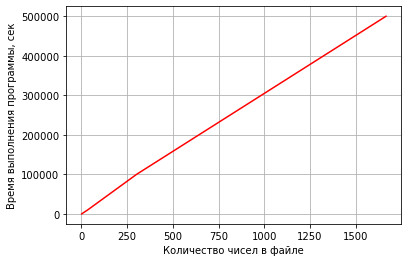

In [51]:
# Matplotlib is a popular module for displaying data
# In this case we will use plot type of diagram
plt.plot(min_time_list, numbers_list_size, color='r', label='Функция минимума')
# styling a bit
plt.xlabel('Количество чисел в файле') 
plt.ylabel('Время выполнения программы, сек')
plt.grid()
# show the plot
plt.show()